In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KadsP0L5kX9uAR7jn12X")
project = rf.workspace("fabric-detection-eqdqr").project("fabric-defect-ope7e")
version = project.version(1)
dataset = version.download("yolov8")



(ai_pipeline) d:\Nabeel\fabric defecr detection>conda.bat activate base 
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-defect-1 in yolov8:: 100%|██████████| 9436/9436 [00:03<00:00, 2959.17it/s]


In [5]:
import os
label_dir = "Fabric-defect-1/train/labels"

classes = set()

for f in os.listdir(label_dir):
    with open(os.path.join(label_dir, f)) as file:
        for line in file:
            cls = int(line.split()[0])
            classes.add(cls)

print("Classes found:", classes)


Classes found: {0, 1, 2, 3, 4}


In [6]:
import os

label_path = "Fabric-defect-1/train/labels"

good = 0
defect = 0

for file in os.listdir(label_path):
    full = os.path.join(label_path, file)

    if os.path.getsize(full) == 0:
        good += 1
    else:
        defect += 1

print("Good images:", good)
print("Defect images:", defect)


Good images: 877
Defect images: 2411


In [ ]:
import networkx.readwrite.json_graph.node_link
from pathlib import Path

base = Path("/d:/Nabeel/fabric defecr detection")

for p in base.rglob("*"):
    if p.is_dir() and p.name in ["good", "defect", "images"]:
        imgs = list(p.glob("*.jpg")) + list(p.glob("*.png"))
        if len(imgs) > 0:
            print(f"Found {len(imgs)} images in: {p}")


In [8]:
import shutil
from pathlib import Path

src = Path("Fabric-defect-1")
dst = Path("fabric_mae")

splits = ["train", "valid", "test"]

for split in splits:
    img_dir = src / split / "images"
    lbl_dir = src / split / "labels"

    if not img_dir.exists():
        print(f"Skipping {split} (not found)")
        continue

    (dst/split/"good").mkdir(parents=True, exist_ok=True)
    (dst/split/"defect").mkdir(parents=True, exist_ok=True)

    for img in img_dir.glob("*"):
        label = lbl_dir/(img.stem + ".txt")

        if label.exists() and label.stat().st_size > 0:
            shutil.copy(img, dst/split/"defect"/img.name)
        else:
            shutil.copy(img, dst/split/"good"/img.name)

print("Reorganization complete.")


Reorganization complete.


In [9]:
import random
import shutil
from pathlib import Path

src_base = Path("/content/fabric_mae/train")
dst_base = Path("/content/sanity_check")

good_src = src_base / "good"
defect_src = src_base / "defect"

good_dst = dst_base / "good"
defect_dst = dst_base / "defect"

good_dst.mkdir(parents=True, exist_ok=True)
defect_dst.mkdir(parents=True, exist_ok=True)

# --- sample size ---
N = 50

good_imgs = list(good_src.glob("*"))
defect_imgs = list(defect_src.glob("*"))

good_sample = random.sample(good_imgs, min(N, len(good_imgs)))
defect_sample = random.sample(defect_imgs, min(N, len(defect_imgs)))

for f in good_sample:
    shutil.copy(f, good_dst / f.name)

for f in defect_sample:
    shutil.copy(f, defect_dst / f.name)

print("Sanity-check dataset created at:", dst_base)
print(f"{len(good_sample)} good images copied")
print(f"{len(defect_sample)} defect images copied")


Sanity-check dataset created at: \content\sanity_check
0 good images copied
0 defect images copied


In [10]:
from pathlib import Path

base = Path("fabric_mae")

for split in ["train", "valid", "test"]:
    g = len(list((base/split/"good").glob("*")))
    d = len(list((base/split/"defect").glob("*")))
    print(f"{split}: good={g}, defect={d}")


train: good=877, defect=2411
valid: good=140, defect=1033
test: good=8, defect=243


In [11]:
import random
import shutil
from pathlib import Path

src_good = Path("fabric_mae/train/good")
src_def  = Path("fabric_mae/train/defect")

dst = Path("sanity_check")
(dst/"good").mkdir(parents=True, exist_ok=True)
(dst/"defect").mkdir(parents=True, exist_ok=True)

good_imgs = list(src_good.glob("*"))
defect_imgs = list(src_def.glob("*"))

print(f"Available good images: {len(good_imgs)}")
print(f"Available defect images: {len(defect_imgs)}")

sample_good = random.sample(good_imgs, min(50, len(good_imgs)))
sample_def  = random.sample(defect_imgs, min(50, len(defect_imgs)))

for f in sample_good:
    shutil.copy(f, dst/"good"/f.name)

for f in sample_def:
    shutil.copy(f, dst/"defect"/f.name)

print("Copied:", len(sample_good), "good and", len(sample_def), "defect images")
print("Check folder → /content/sanity_check")


Available good images: 877
Available defect images: 2411
Copied: 50 good and 50 defect images
Check folder → /content/sanity_check


## **Looking at samples of good images to verify if they are correct**

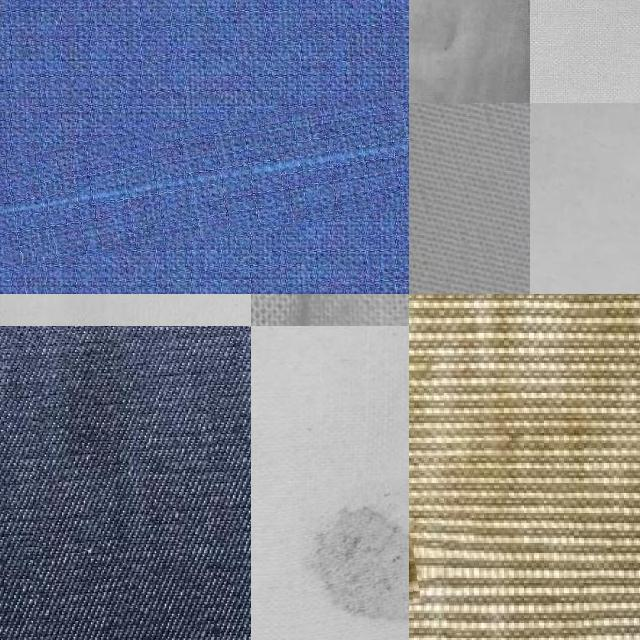

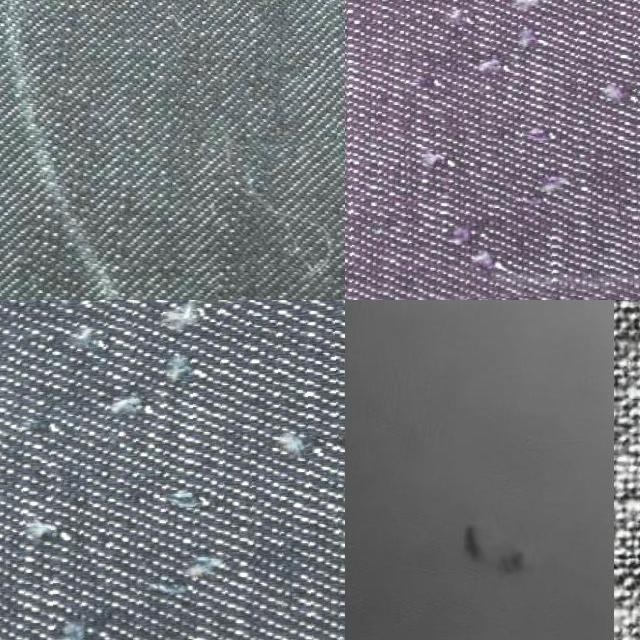

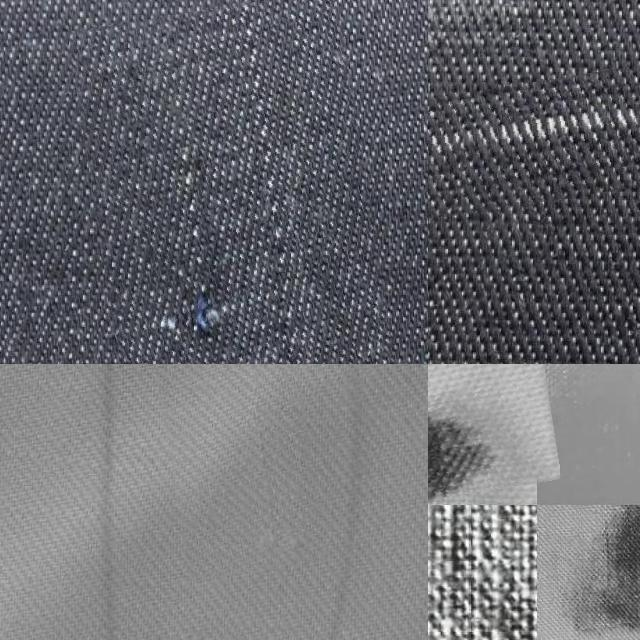

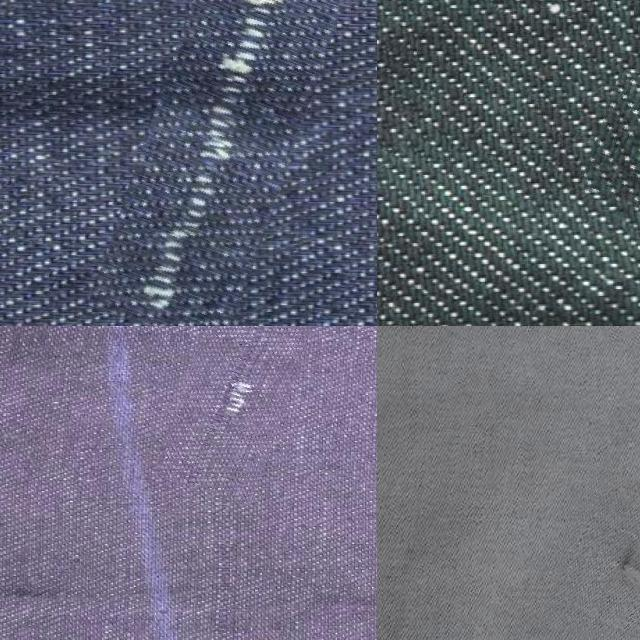

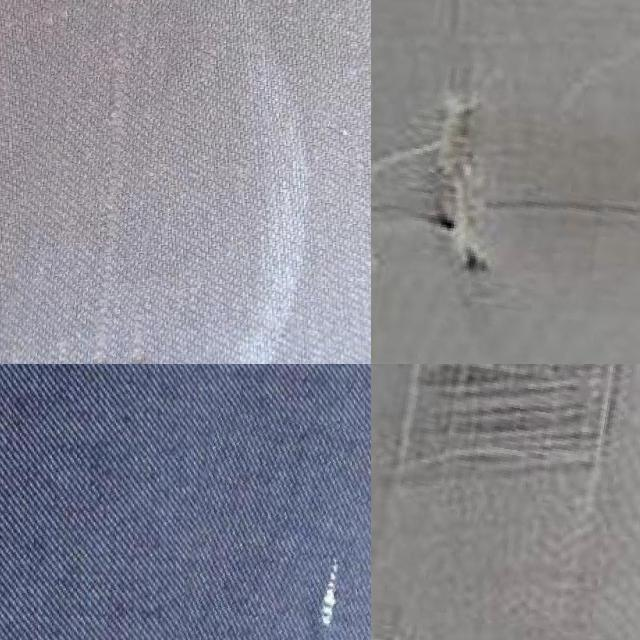

In [12]:
from IPython.display import Image, display
import os, random

folder = "sanity_check/good"
files = random.sample(os.listdir(folder), min(5, len(os.listdir(folder))))

for f in files:
    display(Image(filename=os.path.join(folder, f)))


## **Looking at samples of defect images to verify if they are correct**

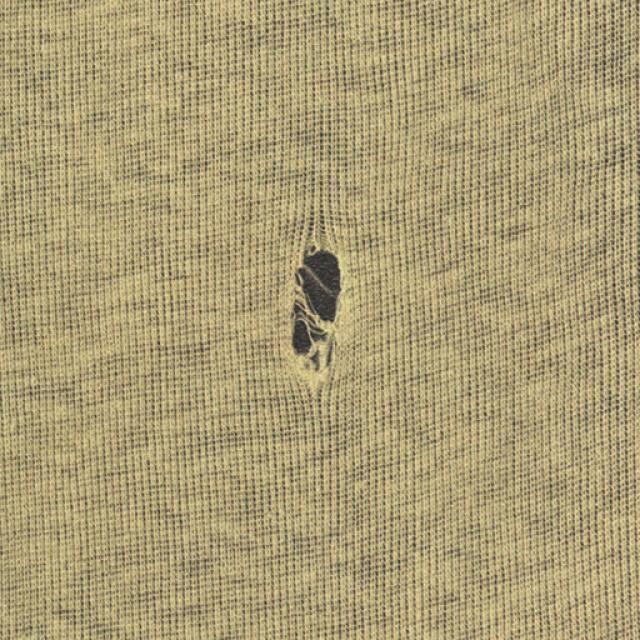

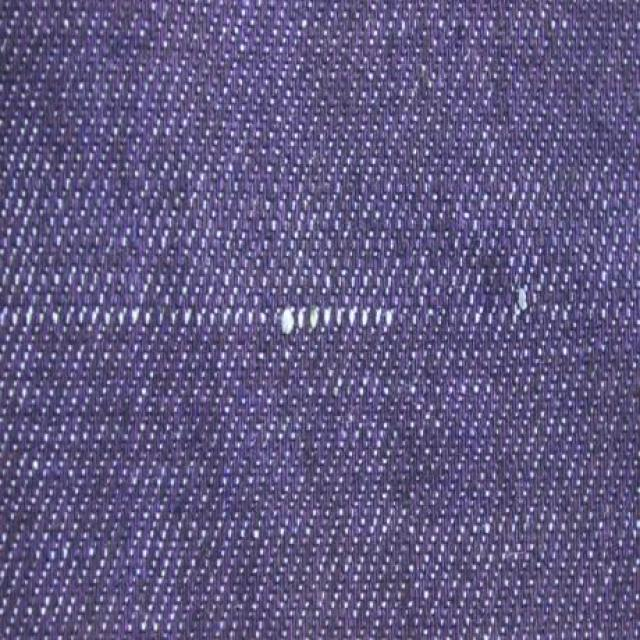

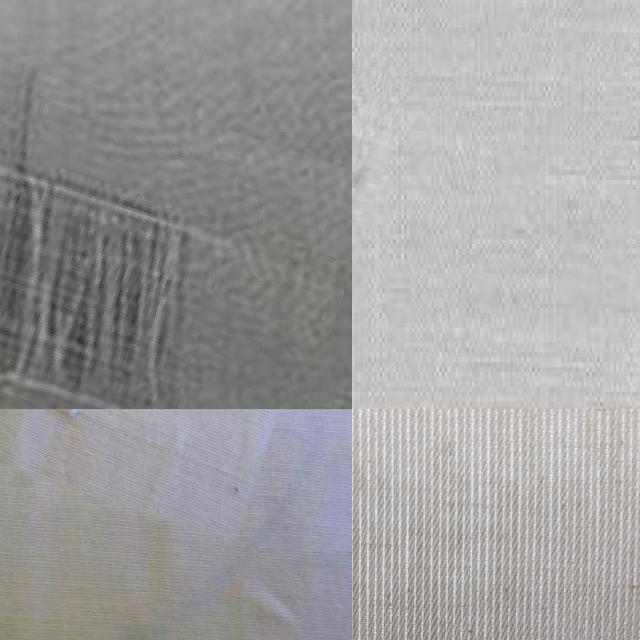

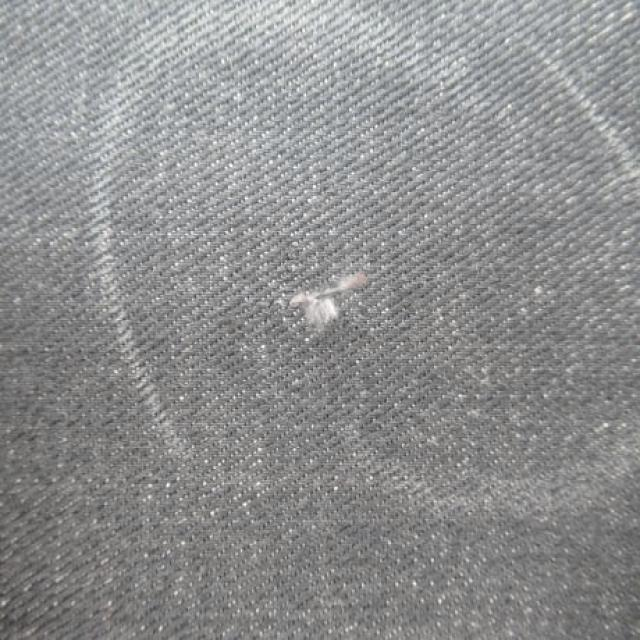

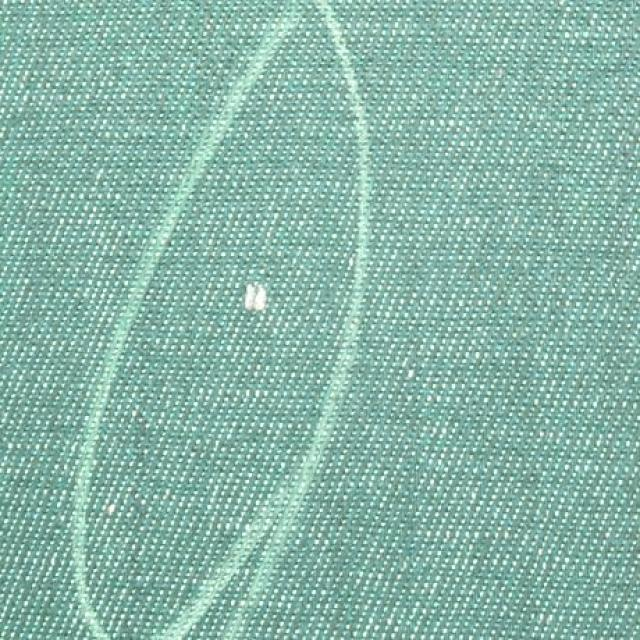

In [13]:
from IPython.display import Image, display
import os, random

folder = "sanity_check/defect"
files = random.sample(os.listdir(folder), min(5, len(os.listdir(folder))))

for f in files:
    display(Image(filename=os.path.join(folder, f)))

## **Installing Dependencies**

In [14]:
!pip install timm einops opencv-python



(ai_pipeline) d:\Nabeel\fabric defecr detection>conda.bat activate base 
  Using cached timm-1.0.24-py3-none-any.whl.metadata (38 kB)
  Using cached einops-0.8.2-py3-none-any.whl.metadata (13 kB)
  Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached torchvision-0.25.0-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached huggingface_hub-1.4.1-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.7.0-cp38-abi3-win_amd64.whl.metadata (4.2 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached anyio-4.12.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached timm-1.0.24-py3-none-any.whl (2.6 MB)
Using cached einops-0.8.2-py3-none-any.whl (65 kB)
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   - -

## **Imports and Devices Check**

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import timm
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Using device: cuda


## **Dataset loader (ONLY Normal Images Used)**

In [19]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from pathlib import Path

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Point directly to the GOOD folder only
good_path = "fabric_mae/train/good"

train_ds = ImageFolder(
    root=str(Path(good_path).parent),  # ImageFolder expects a class folder
    transform=transform
)

# Keep only samples whose path contains "/good/"
train_ds.samples = [s for s in train_ds.samples if "good" in s[0]]
train_ds.targets = [0] * len(train_ds.samples)

print("Training samples (good only):", len(train_ds))

train_loader = DataLoader(
    train_ds,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)


Training samples (good only): 877


## **Fabric aware MAE model Vit-256**

In [20]:
# -------------------------------
# 4️⃣ FabricMAE Model (Pixel-level MAE)
# -------------------------------

class FabricMAE(nn.Module):
    def __init__(self, patch_size=16):
        super().__init__()
        self.patch_size = patch_size

        # Encoder: ViT Base
        self.encoder = timm.create_model(
            "vit_base_patch16_224",
            pretrained=True,
            num_classes=0,
            img_size=256
        )

        # Freeze early blocks
        for blk in self.encoder.blocks[:6]:
            for p in blk.parameters():
                p.requires_grad = False

        dim = self.encoder.embed_dim
        self.decoder = nn.Sequential(
            nn.Linear(dim, patch_size*patch_size*3),  # output pixels per patch
            nn.GELU(),
            nn.Linear(patch_size*patch_size*3, patch_size*patch_size*3)
        )

    # Encoder: patch embedding + positional
    def forward_encoder(self, x):
        x = self.encoder.patch_embed(x)
        x = x + self.encoder.pos_embed[:, 1:, :]  # skip CLS
        return x

    # Transformer blocks
    def forward_transformer(self, x):
        for blk in self.encoder.blocks:
            x = blk(x)
        x = self.encoder.norm(x)
        return x

    # Decoder: reconstruct pixels
    def forward_decoder(self, x):
        return self.decoder(x)

model = FabricMAE().to(device)
print("Model loaded successfully.")


`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pc\.cache\huggingface\hub\models--timm--vit_base_patch16_224.augreg2_in21k_ft_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


Model loaded successfully.


## **Block masking function(only 60% since repitetive patterns**

In [23]:
def block_mask(x, mask_ratio=0.6):
    B, N, D = x.shape
    num_keep = int(N * (1 - mask_ratio))

    noise = torch.rand(B, N, device=x.device)
    ids_shuffle = torch.argsort(noise, dim=1)
    ids_keep = ids_shuffle[:, :num_keep]

    x_masked = torch.gather(
        x, 1,
        ids_keep.unsqueeze(-1).repeat(1, 1, D)
    )

    return x_masked, ids_keep


## **Optimizers**

In [24]:
optimizer = torch.optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4,
    weight_decay=1e-4
)


## **5 epochs sanity training run**

In [29]:
# -------------------------------
# 7️⃣ Training loop (Pixel MAE)
# -------------------------------
epochs = 40

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for imgs, _ in train_loader:
        imgs = imgs.to(device)

        # patch embedding
        patches = model.forward_encoder(imgs)  # (B, N, D)
        masked, ids_keep = block_mask(patches)
        encoded = model.forward_transformer(masked)
        recon_patches = model.forward_decoder(encoded)  # (B, N_masked, patch_size*patch_size*3)
        recon_patches = torch.sigmoid(recon_patches)  # normalize pixels 0-1

        # convert original image to patches
        B, C, H, W = imgs.shape
        ps = model.patch_size
        grid_h = H // ps
        grid_w = W // ps
        img_patches = imgs.unfold(2, ps, ps).unfold(3, ps, ps)
        img_patches = img_patches.permute(0,2,3,1,4,5).contiguous()
        img_patches = img_patches.view(B, grid_h*grid_w, C*ps*ps)

        # only visible patches
        target_visible = torch.gather(
            img_patches, 1,
            ids_keep.unsqueeze(-1).repeat(1,1,img_patches.shape[-1])
        )

        loss = ((recon_patches - target_visible)**2).mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}  Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/40  Loss: 0.0007
Epoch 2/40  Loss: 0.0008
Epoch 3/40  Loss: 0.0007
Epoch 4/40  Loss: 0.0007
Epoch 5/40  Loss: 0.0007
Epoch 6/40  Loss: 0.0007
Epoch 7/40  Loss: 0.0007
Epoch 8/40  Loss: 0.0007
Epoch 9/40  Loss: 0.0007
Epoch 10/40  Loss: 0.0007
Epoch 11/40  Loss: 0.0007
Epoch 12/40  Loss: 0.0007
Epoch 13/40  Loss: 0.0007
Epoch 14/40  Loss: 0.0006
Epoch 15/40  Loss: 0.0007
Epoch 16/40  Loss: 0.0007
Epoch 17/40  Loss: 0.0007
Epoch 18/40  Loss: 0.0006
Epoch 19/40  Loss: 0.0006
Epoch 20/40  Loss: 0.0006
Epoch 21/40  Loss: 0.0007
Epoch 22/40  Loss: 0.0007
Epoch 23/40  Loss: 0.0006
Epoch 24/40  Loss: 0.0007
Epoch 25/40  Loss: 0.0007
Epoch 26/40  Loss: 0.0006
Epoch 27/40  Loss: 0.0006
Epoch 28/40  Loss: 0.0007
Epoch 29/40  Loss: 0.0102
Epoch 30/40  Loss: 0.0123
Epoch 31/40  Loss: 0.0072
Epoch 32/40  Loss: 0.0069
Epoch 33/40  Loss: 0.0067
Epoch 34/40  Loss: 0.0064
Epoch 35/40  Loss: 0.0056
Epoch 36/40  Loss: 0.0053
Epoch 37/40  Loss: 0.0049
Epoch 38/40  Loss: 0.0046
Epoch 39/40  Loss: 0.

In [30]:
# -------------------------------
# 8️⃣ Merge patches to image (for inference)
# -------------------------------
def merge_patches(patches, patch_size, grid_h, grid_w):
    B, N, D = patches.shape
    C = 3
    patches = patches.view(B, grid_h, grid_w, C, patch_size, patch_size)
    patches = patches.permute(0,1,4,2,5,3).contiguous()  # row-major
    img = patches.view(B, grid_h*patch_size, grid_w*patch_size, C)
    return img[0].cpu().numpy()


In [65]:
def inference_display(img_path, model, patch_size=16, device="cuda"):
    """
    Runs MAE inference on a single image, computes per-image error map,
    applies FINAL REFINED thresholding, morphology, edge suppression, 
    and displays:
    1) Original image
    2) Heatmap
    3) Bounding boxes
    """
    from PIL import Image
    # Load image
    img = Image.open(img_path).convert("RGB")
    img_tensor = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ])(img).unsqueeze(0).to(device)

    # Model inference
    model.eval()
    with torch.no_grad():
        tokens = model.forward_encoder(img_tensor)
        encoded = model.forward_transformer(tokens)
        recon_patches = torch.sigmoid(model.forward_decoder(encoded))
        B, N, D = recon_patches.shape
        grid_h = grid_w = int(np.sqrt(N))

    # Merge patches
    recon_img = merge_patches(recon_patches, patch_size, grid_h, grid_w)

    # Compute per-image error map
    img_np = np.array(img.resize((256,256))).astype(np.float32)/255.0
    error_map = np.mean((img_np - recon_img)**2, axis=-1)

    # -------------------------------
    # FINAL REFINED Post-Processing
    # -------------------------------
    # 1️⃣ Smooth heatmap to connect fragmented pixels
    error_map = cv2.GaussianBlur(error_map, (7, 7), 0)

    mean_err = np.mean(error_map)
    std_err = np.std(error_map)

    # 2️⃣ Threshold with Noise Floor
    NOISE_FLOOR = 0.002
    thresh_value = max(NOISE_FLOOR, mean_err + 3.0 * std_err)
    mask = (error_map > thresh_value).astype(np.uint8) * 255

    # 3️⃣ Edge Suppression (remove artifacts near image borders)
    border = 20
    mask[:border, :] = 0
    mask[-border:, :] = 0
    mask[:, :border] = 0
    mask[:, -border:] = 0

    # 4️⃣ Stronger Morphology to connect segments
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_close)

    # Dilation to ensure full coverage of defect
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.dilate(mask, kernel_dilate, iterations=1)

    # -------------------------------
    # 5️⃣ Contour detection & filtering
    # -------------------------------
    img_cv = (img_tensor.squeeze(0).permute(1,2,0).cpu().numpy()*255).astype(np.uint8)
    img_cv_bgr = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        if cv2.contourArea(c) > 500:  # slightly higher area threshold to remove tiny artifacts
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(img_cv_bgr, (x, y), (x+w, y+h), (0, 0, 255), 2)

    img_bbox = cv2.cvtColor(img_cv_bgr, cv2.COLOR_BGR2RGB)

    # -------------------------------
    # Display results separately
    # -------------------------------
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img_np)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(error_map, cmap='jet')
    plt.title("Anomaly Heatmap")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(img_bbox)
    plt.title("Bounding Boxes")
    plt.axis('off')

    plt.show()

    print("Bounding boxes drawn:", sum(cv2.contourArea(c) > 150 for c in contours))

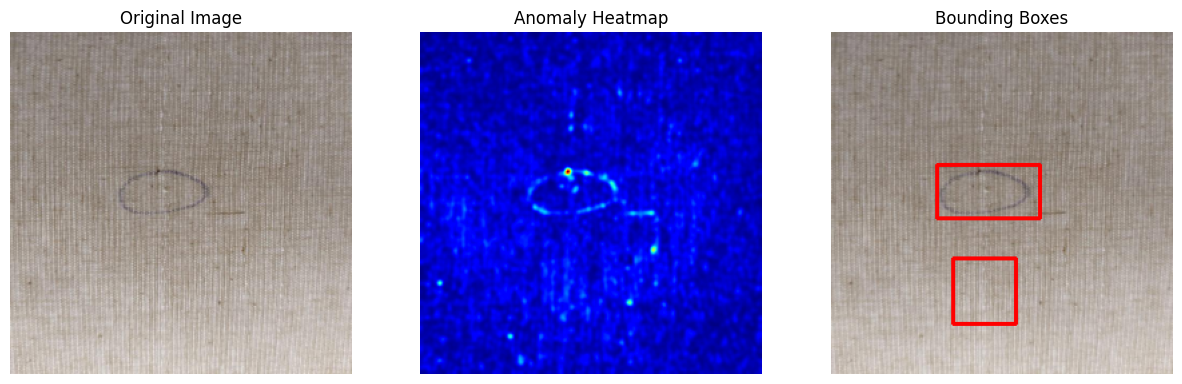

Bounding boxes drawn: 5


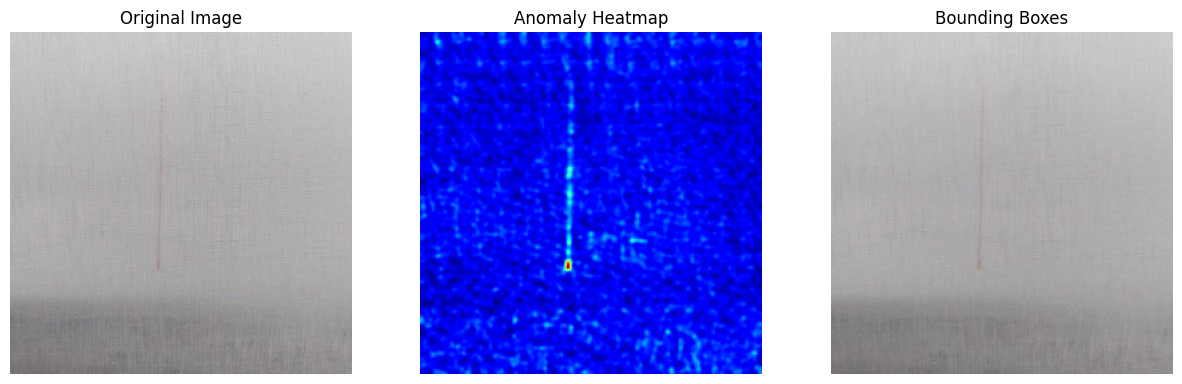

Bounding boxes drawn: 0


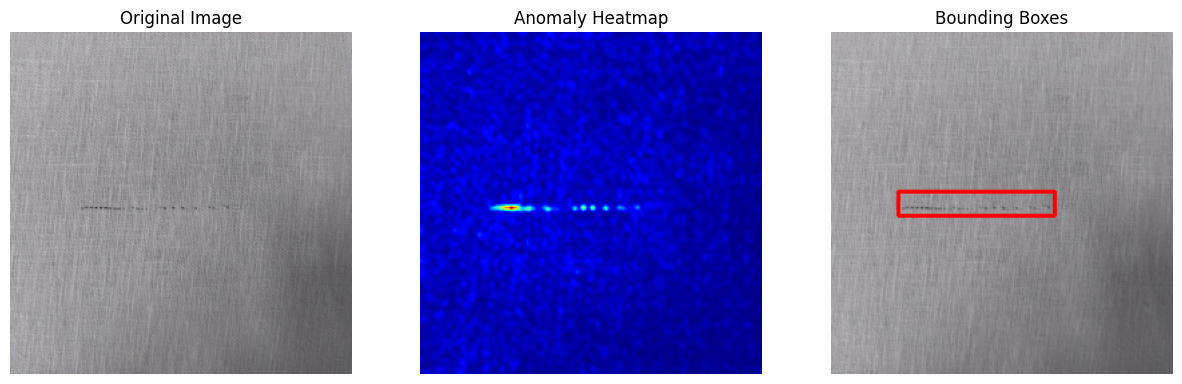

Bounding boxes drawn: 1


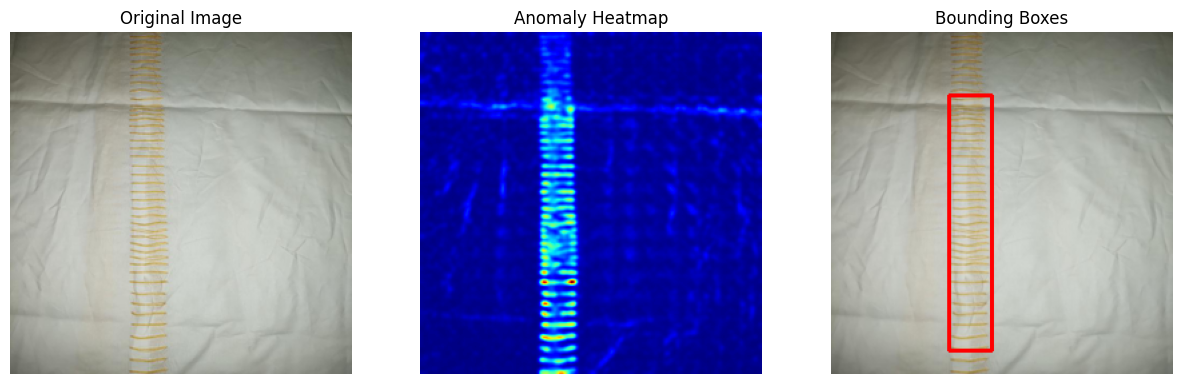

Bounding boxes drawn: 1


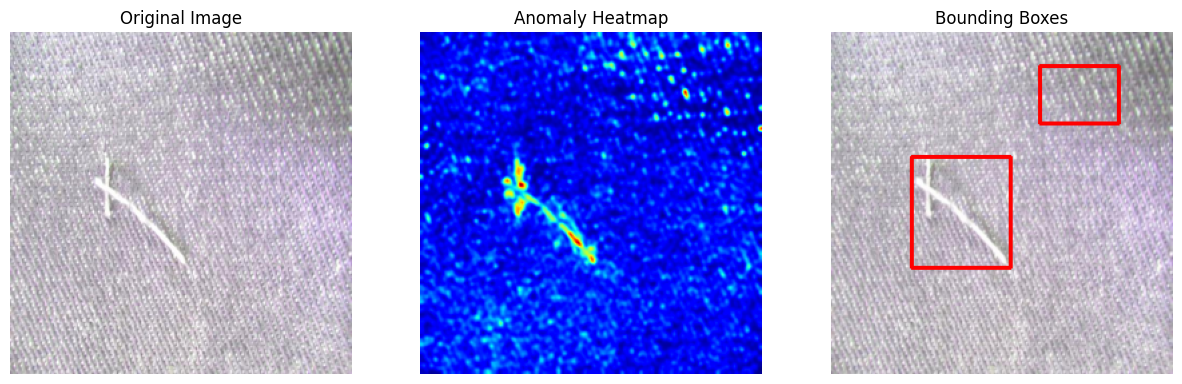

In [ ]:
test_images = [
    "fabric_mae/test/defect/1.jpg",
    "fabric_mae/test/defect/2.jpg",
    "fabric_mae/test/defect/3.jpg",
    "fabric_mae/test/defect/5.jpg",
    "fabric_mae/test/defect/77.jpg",
    "fabric_mae/test/defect/131.jpg",
    "fabric_mae/test/defect/242.jpg",

]

for img_path in test_images:
    inference_display(img_path, model, patch_size=16, device=device)
